In [1]:
from new_rewards import *
import pandas as pd
import os
def parse_problems(domains_list):
    result_domain_addition = {}
    df = pd.DataFrame(columns=['domain', 'type', 'total_plans', 'true_plans', 'false_plans', 'accuracy'])

    for test in domains_list:
        if test[0] == "satellite" and test[1] == "new_eval_with_types/test_beam_1/0_actions/":
            dict_actions_domain['satellite'] = dict_actions_s_invariant
        elif test[0] == "satellite":
            dict_actions_domain['satellite'] = dict_actions_s_normal
        domain = test[0]
        addition = test[1]
        result_list = []

        folder_data_path = "../generations/" + domain + "/" + addition
        #folder_data_path = "../generated_sorted/" + domain + "/input/" + addition
        # Controllo se esiste
        if not os.path.exists(folder_data_path):
            print(f"Folder not found {folder_data_path}\n")
            continue
        for file in glob.iglob(f'{folder_data_path}*'):
            with open(file) as json_file:
                if file.endswith(".json"):
                    data = json.load(json_file)
                    #for plan in data[0]:
                    for plan in data:
                        if type(plan['plan']) == list:
                            tmp_results = []
                            # Scorro ogni possibile piano e lo verifico singolarmente
                            for i in range(len(plan['plan'])):
                                tmp_plan = {}
                                tmp_plan['actions'] = plan['plan'][i]
                                tmp_plan['input'] = plan['input']
                                tmp_res = parse_problem(tmp_plan, domain)
                                tmp_results.append((tmp_plan, tmp_res))
                        
                            min_plan = None
                            for x in tmp_results:
                                p, res = x
                                if res[0] is True:
                                    if min_plan is None or len(p['actions']) < len(min_plan[0]['actions']):
                                        min_plan = x
                            if min_plan is not None:
                                result_list.append(min_plan)
                            else:
                                result_list.append(tmp_results[0])
                        else:
                        
                            plan['actions'] = rimuovi_spazi(plan['plan'])
                            #plan['input'] = "<|startofplan|> " + plan['initial_state'] + " <|goals|> " + plan['goals'] + " <|actions|>"
                            plan['input'] = rimuovi_spazi(plan['input'])           
                            result = parse_problem(plan, domain)
                            result_list.append((plan, result))
            
        true_plans = []
        false_plans = []
        for result in result_list:
            if result[1][0] is True:
                true_plans.append(result)
            elif result[1][0] is False:
                false_plans.append(result)

        print("Test su " + domain + " " + addition + ' ' + test[2])
        print("Numero totale di piani di test: " + str(len(result_list)))
        print("Numero di piani che soddisfano tutti i goals: " + str(len(true_plans)))
        print("Numero di piani non validi: " + str(len(false_plans)))
        try:
            df.loc[len(df)] = [domain, test[2], len(result_list), len(true_plans), len(false_plans), len(true_plans)*100/len(result_list)]
            print("Accuracy: " + str(len(true_plans)*100/len(result_list)))
        except:
            df.loc[len(df)] = [domain, test[2], 0, 0, 0, 0]
            print("Accuracy: 0.0")
        print("-"*50)
        result_domain_addition[domain+" "+addition] = (result_list, true_plans, false_plans)
    return result_domain_addition, df

domains_name = ["satellite", "driverlog", "depots", "zenotravel", "visitall"]
domains_list = []
for domain in domains_name:
    domains_list.append((domain, "greedy/0_actions/", "greedy"))
    domains_list.append((domain, "multibeam/0_actions/", "multi"))
    domains_list.append((domain, "sampling/0_actions_top_p_0.9/", "samp"))
result_domain_addition, df = parse_problems(domains_list)

Test su satellite greedy/0_actions/ greedy
Numero totale di piani di test: 6505
Numero di piani che soddisfano tutti i goals: 5536
Numero di piani non validi: 969
Accuracy: 85.10376633358955
--------------------------------------------------
Test su satellite multibeam/0_actions/ multi
Numero totale di piani di test: 6505
Numero di piani che soddisfano tutti i goals: 6179
Numero di piani non validi: 326
Accuracy: 94.98847040737894
--------------------------------------------------
Test su satellite sampling/0_actions_top_p_0.9/ samp
Numero totale di piani di test: 6505
Numero di piani che soddisfano tutti i goals: 6382
Numero di piani non validi: 123
Accuracy: 98.10914681014604
--------------------------------------------------
Test su driverlog greedy/0_actions/ greedy
Numero totale di piani di test: 7500
Numero di piani che soddisfano tutti i goals: 5349
Numero di piani non validi: 2151
Accuracy: 71.32
--------------------------------------------------
Test su driverlog multibeam/0_a

In [2]:
from IPython.display import display
#Rimuovo dal dataframe le righe con valore zero
df_no_zero = df[df['total_plans'] != 0]
'''for domain in df['domain'].unique():
    tmp = df[df['domain'] == domain]
    display(tmp)'''
display(df_no_zero)
display(df)

,domain,type,total_plans,true_plans,false_plans,accuracy
0,satellite,greedy,6505,5536,969,85.103766
1,satellite,multi,6505,6179,326,94.988470
2,satellite,samp,6505,6382,123,98.109147
3,driverlog,greedy,7500,5349,2151,71.320000
4,driverlog,multi,7400,5963,1437,80.581081
5,driverlog,samp,7500,7342,158,97.893333
6,depots,greedy,7041,5610,1431,79.676182
7,depots,multi,4500,4088,412,90.844444
8,depots,samp,7041,6685,356,94.943900
9,zenotravel,greedy,7138,6439,699,90.207341


,domain,type,total_plans,true_plans,false_plans,accuracy
0,satellite,greedy,6505,5536,969,85.103766
1,satellite,multi,6505,6179,326,94.988470
2,satellite,samp,6505,6382,123,98.109147
3,driverlog,greedy,7500,5349,2151,71.320000
4,driverlog,multi,7400,5963,1437,80.581081
5,driverlog,samp,7500,7342,158,97.893333
6,depots,greedy,7041,5610,1431,79.676182
7,depots,multi,4500,4088,412,90.844444
8,depots,samp,7041,6685,356,94.943900
9,zenotravel,greedy,7138,6439,699,90.207341


In [3]:
#result_domain_addition['blocksworld IPC_PROVA/test_beam_1/0_actions/'][0][0][0]['problem_id']

In [4]:
for problem in result_domain_addition['blocksworld IPC_PROVA/test_beam_1/0_actions/'][0]:
    if problem[0]['problem_id'] == "problem00201":
        print(problem)
    

KeyError: 'blocksworld IPC_PROVA/test_beam_1/0_actions/'

In [ ]:
import os

# SALVATAGGIO di tutti i piani falliti in file json
for k in result_domain_addition.keys():
    print(k)
    domain, addition = k.split(' ')
    folder = f"../generated_sorted/{domain}/errors/{addition}"
    if not os.path.exists(folder):
        os.makedirs(folder)
    _, _, false_plans = result_domain_addition[k]
    to_save = []
    for x in false_plans:
        to_save.append(x[0])
    print(false_plans[0])
    import json
    json_string = json.dumps(to_save, indent=4)

    with open(os.path.join(folder, "plans.json"), "w") as f:
        f.write(json_string)
    print(len(false_plans))

In [ ]:
# GRAFICO
import matplotlib.pyplot as plt
import numpy as np
# Dati del DataFrame
index = df.index
accuracy = df['accuracy']

# Ottieni i domini unici presenti nel DataFrame
unique_domains = df['domain'].unique()

# Imposta l'altezza e lo spazio tra le barre
bar_height = 0.3
spacing = 0.3

# Definisci palette personalizzate per ogni dominio con colori meno luminosi
palettes = {
    'logistics': ['#1f77b4', '#0b559f','#183d77', '#012f68', '#0a2a53', '#091f44', ],
    'satellite': ['#008000', '#006400', '#003800', '#002600', '#000500', '#000200'],
    'zenotravel': ['#ff0000', '#800000', '#660000', '#4c0000', '#320000', '#0f0000'],
    'depots': ['#ffa500', '#d18407', '#a76d0c', '#80550b', '#64470b', '#4a3c0a', '#2f2807', '#1b1704', '#0d0c02', '#050300'],
    'blocksworld': ['#800080', '#5a035a', '#6b036b', '#7b047b', '#8c058c', '#9c059c', '#ad06ad', '#bd06bd', '#cf07cf', '#df07df'],
    'driverlog': ['#8b4513', '#6c3a0a', '#532e08', '#3c2306', '#2a1904', '#1b0e03', '#100603', '#090302', '#050201', '#010100']
}

# Crea i sottografi a griglia 3x2
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))

# Crea il grafico orizzontale per ogni dominio
for i, domain in enumerate(unique_domains):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    domain_data = df[df['domain'] == domain]
    y_positions = [j for j in range(len(domain_data))]
    num_plans = len(domain_data)

    # Assegna un colore personalizzato a ciascuna barra all'interno del sottografo
    max_accuracy = domain_data['accuracy'].max()
    palette = palettes[domain]
    for j in range(num_plans):
        plan_color = palette[j % len(palette)]  # Prende il colore dalla palette in base all'indice
        ax.barh(y_positions[j], domain_data['accuracy'].iloc[j], height=bar_height, color=plan_color)

    # Aggiungi etichette personalizzate per ogni colonna
    labels = [f"{type}" for domain, type in zip(domain_data['domain'], domain_data['type'])]
    ax.set_yticks(y_positions)
    ax.set_yticklabels(labels)

    # Aggiungi etichette
    ax.set_title(f'{domain}')
    from math import floor
    # Imposta i ticks dell'asse x da 0 a 100 con incrementi di 10 per ogni sottografo
    max_accuracy = floor(max_accuracy) 
    ax.set_xticks(max_accuracy * np.arange(0, 1.1, 0.1))

# Aggiusta i sottografi per evitare sovrapposizioni delle etichette
plt.tight_layout()

# Mostra i grafici
plt.show()

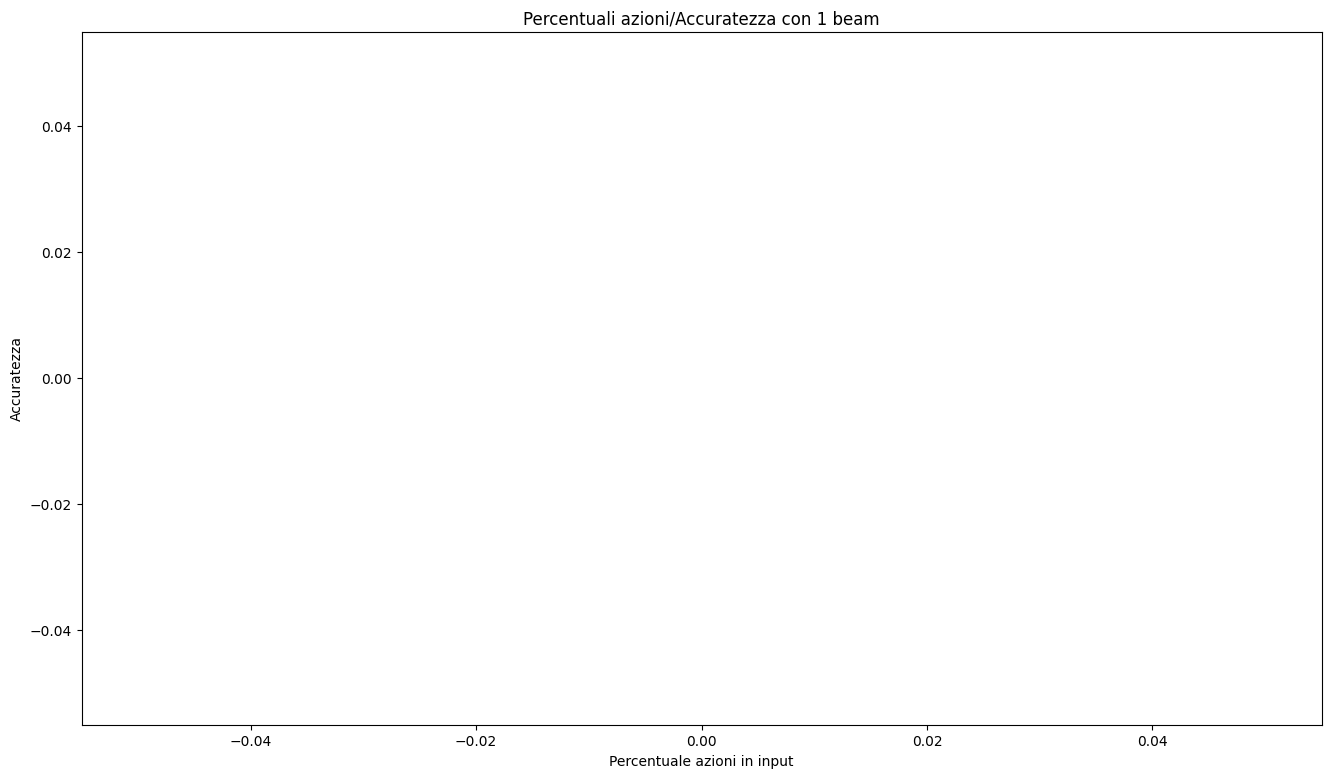

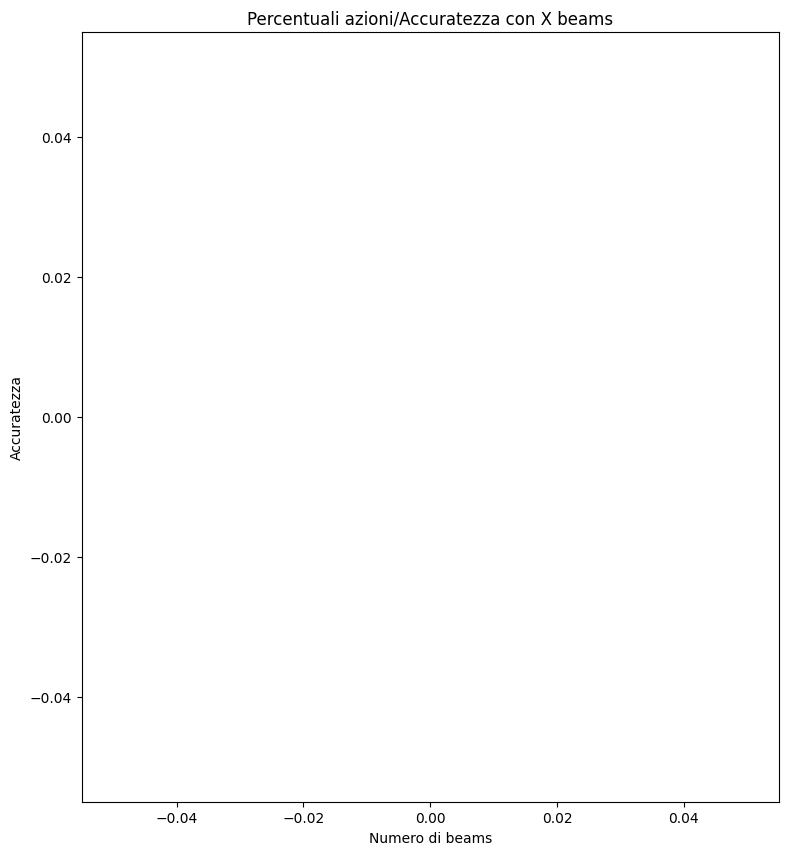

In [5]:

# Grafici per logistics
import matplotlib.pyplot as plt
points = df_no_zero[df_no_zero['domain']=='logistics']
titles = [('Percentuali azioni/Accuratezza con 1 beam', 'Percentuale azioni in input', 'Accuratezza',r'^actions_ids_new_metric_\d*', 'actions_ids_new_metric_'),
          ('Percentuali azioni/Accuratezza con X beams', 'Numero di beams', 'Accuratezza',r'^beams_\d*', 'beams_'),]
sizes = [(16,9), (9, 10)]
for idx,params in enumerate(titles):
    title, xlabel, ylabel, regex, renamer = params
    tmp_points = points[points['type'].str.match(regex)]
    names = [x.replace(renamer, '') for x in tmp_points['type']]
    x = names
    y = tmp_points['accuracy']
    plt.figure(figsize=sizes[idx])
    #print(x, y)
    #plt.subplot(1, 2, idx+1)
    plt.title(title)

    plt.plot(x, y, color='blue', marker='o', linestyle='dashed')
    #plt.bar(x, y, color='blue', width=0.5)
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.annotate(f'{yi:.2f}', (xi, yi), textcoords="offset points",
                    xytext=(0,10), ha='right', va='bottom', )

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [ ]:
logistics_list = [
    ('logistics', 'ipc/test_beam_1/0_actions/', 'greedy'),
    ('logistics', 'ipc/test_beam_10/0_actions_top_p_0.9/', 'top p'),
    ('logistics', 'ipc/test_beam_multi_best/0_actions/', 'multibest')]

In [ ]:
domains_list.remove(("depots", "ipc_no_cycles_min_loss/test_beam_1/0_actions/", "greedy minloss"))  
domains_list.remove(("zenotravel", "ipc_no_cycles_min_loss/test_beam_1/0_actions/", "greedy minloss"))
domains_list

In [3]:
for (domain, addition, alias) in domains_list:

    print("Analisi in corso di: " + domain + " " + addition)

    if domain == "satellite" and addition == "invariant/":
        dict_actions_domain['satellite'] = dict_actions_s_invariant
    elif domain == "satellite" and (addition == "normal_left/" 
                                     or addition == "training_left/"
                                     or addition == "training_right/"
                                     or addition == "normal_right/"):
        dict_actions_domain['satellite'] = dict_actions_s_normal
    
    true_plans = result_domain_addition[domain+" "+addition][1]
    false_plans = result_domain_addition[domain+" "+addition][2]

    violed_preconditions_plans = []
    goals_not_succesfull_plans = []
    object_number_wrong_plans = []
    action_wrong_plans = []

    for plan in false_plans:
        if plan[1][2] == "violed_preconditions":
            violed_preconditions_plans.append(plan)
        elif plan[1][2] == "goals_not_succesfull":
            goals_not_succesfull_plans.append(plan)
        elif plan[1][2] == "object_number_wrong":  
            object_number_wrong_plans.append(plan)
        elif plan[1][2] == "action_wrong":
            action_wrong_plans.append(plan)

    print("I piani con precondizioni violate sono: " + str(len(violed_preconditions_plans)))
    print("I piani con goals non soddisfatti sono: " + str(len(goals_not_succesfull_plans)))
    print("I piani con numero di oggetti errati sono: " + str(len(object_number_wrong_plans)))
    print("I piani con azione errata sono: " + str(len(action_wrong_plans)))
    print("")
    #print(str(len(false_plans)) + " deve coincidere con " + str(len(violed_preconditions_plans) + len(goals_not_succesfull_plans) + len(object_number_wrong_plans) + len(action_wrong_plans)))

    action_violed_plans = {}
    action_prec_violed_plans = {}
    for key in dict_actions_domain[domain].keys():
        action_violed_plans[key] = []
        action_prec_violed_plans[key] = {}
        
    for plan in violed_preconditions_plans:
        action_violed_plans[plan[1][5]].append(plan)
        for prec in plan[1][3]:
            if prec not in action_prec_violed_plans[plan[1][5]].keys():
                action_prec_violed_plans[plan[1][5]][prec] = 0
            action_prec_violed_plans[plan[1][5]][prec] = action_prec_violed_plans[plan[1][5]][prec] + 1
    for key in action_violed_plans.keys():
        print("I miei piani violano l'azione " + key + ": " + str(len(action_violed_plans[key])) + " " + str(action_prec_violed_plans[key]))
    print("")

    number_missing_actions = {}
    for plan in true_plans:
        if plan[1][3] not in number_missing_actions.keys():
            number_missing_actions[plan[1][3]] = 0
        number_missing_actions[plan[1][3]] = number_missing_actions[plan[1][3]] + 1
    print("Numero di azioni dopo il raggiungimento del goals:")
    for key in sorted(number_missing_actions.keys()):
        print(str(key) + ": " + str(number_missing_actions[key]) +' piani')

    print("")
    print("")
            

result_domain_addition[domain+" "+addition][2][0][0]

Analisi in corso di: satellite greedy/0_actions/
I piani con precondizioni violate sono: 941
I piani con goals non soddisfatti sono: 25
I piani con numero di oggetti errati sono: 3
I piani con azione errata sono: 0

I miei piani violano l'azione turn-to: 4 {'pointing_satellite_direction': 4}
I miei piani violano l'azione switch-on: 72 {'power-avail_satellite': 70, 'on-board_instrument_satellite': 2}
I miei piani violano l'azione switch-off: 0 {}
I miei piani violano l'azione calibrate: 90 {'calibration-target_instrument_direction': 88, 'pointing_satellite_direction': 2, 'on-board_instrument_satellite': 1}
I miei piani violano l'azione take-image: 775 {'supports_instrument_mode': 774, 'pointing_satellite_direction': 1}

Numero di azioni dopo il raggiungimento del goals:
0: 5536 piani


Analisi in corso di: satellite multibeam/0_actions/
I piani con precondizioni violate sono: 322
I piani con goals non soddisfatti sono: 4
I piani con numero di oggetti errati sono: 0
I piani con azione er

{'actions': 'switch-on instrument4 satellite3 turn-to satellite3 direction18 direction22 switch-on instrument3 satellite2 turn-to satellite1 direction5 direction3 calibrate satellite3 instrument4 direction18 calibrate satellite2 instrument3 direction11 turn-to satellite3 direction21 direction18 turn-to satellite2 direction13 direction11 take-image satellite3 direction21 instrument4 mode4 take-image satellite2 direction13 instrument3 mode5 turn-to satellite3 direction6 direction21 turn-to satellite2 direction23 direction13 take-image satellite3 direction6 instrument4 mode4 take-image satellite2 direction23 instrument3 mode1 turn-to satellite3 direction8 direction6 turn-to satellite2 direction12 direction23 take-image satellite3 direction8 instrument4 mode4 take-image satellite2 direction12 instrument3 mode5 turn-to satellite3 direction16 direction8 turn-to satellite2 direction19 direction12 take-image satellite3 direction16 instrument4 mode4 take-image satellite2 direction19 instrument3